## Tableau Challenge ETL Program
This code reads data files taken from the CitiBike website, loads the data, cleans it, combines it, then saves in a new CSV file.

In [1]:
import pandas as pd
import datetime as dt
from datetime import tzinfo, timedelta, datetime
from dateutil.parser import parse
from glob import glob
from time import sleep
from IPython.display import clear_output, display

In [2]:
#Using Glob to load CSV files.  Creates a list of dataframes (each dataframe is one of the CSV files)
# Loading data files
filenames = glob('Resources/*.csv')
data_citibike_list = [pd.read_csv(f, dtype = str) for f in filenames]


In [ ]:
#verifying number of dataframes.
len(data_citibike_list)

In [3]:
#checking column headings on each dataframe
for i in range(0,len(data_citibike_list)):
    print(i)
    print(data_citibike_list[i].columns)

0
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
1
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
2
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
3
Index(['tri

In [4]:
#replacing all dataframe column headings with a standardized naming convention
column_names = ['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender']
for i in range(0,len(data_citibike_list)):
    data_citibike_list[i].columns = column_names

In [5]:
#merging cleaned dataframes into one.

data_citibike_df=pd.DataFrame()

for i in range(0,len(data_citibike_list)):
    data_citibike_df = data_citibike_df.append(data_citibike_list[i])


In [6]:
#finding number of null fields
data_citibike_df.isnull().sum().sum()

999853

In [8]:
#checking original dataframe size
data_citibike_df.shape

(16929494, 15)

In [9]:
#removing NULL values from dataframe
data_citibike_df = data_citibike_df.dropna()

In [10]:
#finding change in shape after removal
data_citibike_df.shape

(15991603, 15)

In [11]:
data_citibike_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1015,2013-12-01 00:00:03,2013-12-01 00:16:58,401,Allen St & Rivington St,40.72019576,-73.98997825,476,E 31 St & 3 Ave,40.74394314,-73.97966069,14729,Subscriber,1979,2
1,962,2013-12-01 00:00:07,2013-12-01 00:16:09,312,Allen St & E Houston St,40.722055,-73.989111,223,W 13 St & 7 Ave,40.73781509,-73.99994661,17871,Subscriber,1970,2
2,768,2013-12-01 00:00:15,2013-12-01 00:13:03,326,E 11 St & 1 Ave,40.72953837,-73.98426726,291,Madison St & Montgomery St,40.713126,-73.984844,18508,Subscriber,1982,2
3,218,2013-12-01 00:00:49,2013-12-01 00:04:27,2021,W 45 St & 8 Ave,40.75929124,-73.98859651,447,8 Ave & W 52 St,40.76370739,-73.9851615,17745,Subscriber,1976,1
4,550,2013-12-01 00:01:28,2013-12-01 00:10:38,439,E 4 St & 2 Ave,40.7262807,-73.98978041,296,Division St & Bowery,40.71413089,-73.9970468,16947,Subscriber,1983,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882268,685,2020-06-30 23:59:41.1160,2020-07-01 00:11:06.7790,503,E 20 St & Park Ave,40.73827428,-73.98751968,3746,6 Ave & Broome St,40.724308321602166,-74.00473035871983,21056,Customer,1993,2
1882269,446,2020-06-30 23:59:46.4260,2020-07-01 00:07:13.0860,3699,W 50 St & 9 Ave,40.763604677958625,-73.98917958140373,523,W 38 St & 8 Ave,40.75466591,-73.99138152,30164,Customer,1969,0
1882270,439,2020-06-30 23:59:47.4770,2020-07-01 00:07:06.5590,3699,W 50 St & 9 Ave,40.763604677958625,-73.98917958140373,523,W 38 St & 8 Ave,40.75466591,-73.99138152,43742,Customer,1986,1
1882271,890,2020-06-30 23:59:53.3950,2020-07-01 00:14:43.4270,3852,Stewart Ave & Johnson Ave,40.70869,-73.92587,3054,Greene Ave & Throop Ave,40.6894932,-73.942061,15787,Subscriber,1994,1


The following code parses the date code for the start time of the trip.  It separates the hours (taken as decimal form of hours an minutes), day of the month, the month (as numeric field), and year. These are placed into the dataframe as new columns.  

Because of the large number of lines this takes a long time to run.  To track progress it was desirable to print the every 1000 row numbers.  However, did not want to have it write a new line each time but rather update a given line.  The clear_output line allows this to happen.  The plot below shows the hour versus lines processed.  As you can see it is processing about 1.2 million lines per hour.  At 15 Million lines it takes 12.5 hours.

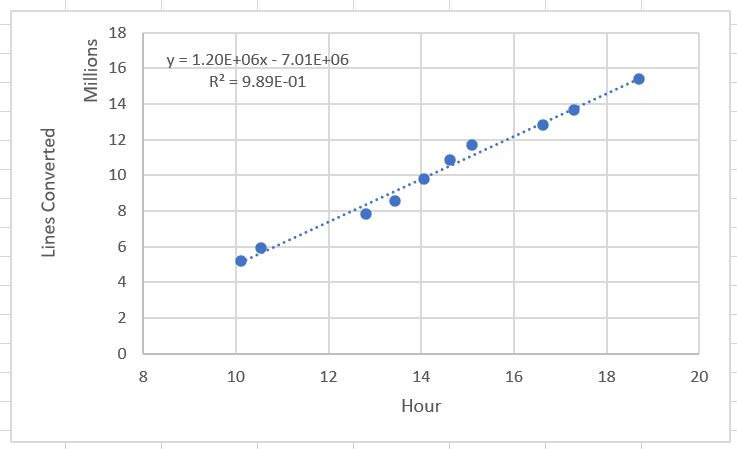

In [13]:
#using parse to extract hours, day, month year and placing in data frame
hours = []
day = []
month = []
year = []
for i in range(0,len(data_citibike_df)):
            hours.append( round(parse(data_citibike_df.iloc[i][1]).hour +parse(data_citibike_df.iloc[i][1]).minute/60+parse(data_citibike_df.iloc[i][1]).second/3600,3))
            day.append(parse(data_citibike_df.iloc[i][1]).day)
            month.append(parse(data_citibike_df.iloc[i][1]).month)
            year.append(parse(data_citibike_df.iloc[i][1]).year)
            if(i % 1000 == 0):
                clear_output(wait=True)
                print(i)  # use display(f) if you encounter performance issues
                sleep(0.01)


data_citibike_df.insert(2,"start_day",day,True)
data_citibike_df.insert(3,"start_hour",hours,True)
data_citibike_df.insert(4,"month",month,True)
data_citibike_df.insert(5,"year",year,True)

15991000


In [14]:
#writing output csv file.
data_citibike_df.to_csv('2013_2020_June_Dec_comb_1.csv')

In [ ]:
len(hours)

In [ ]:
(data_citibike_df.iloc[5563280][1])